# Baseline CNN + TF-IDF Unigram

## Import Library

In [21]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Input, Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

## Import Dataset

In [22]:
df = pd.read_csv('tweet_after_preprocessing_29k.csv', usecols = ['detokenize', 'label_1'])
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [23]:
df = df.dropna()
df

,label_1,detokenize
0,1,cewek tolol sedih bego
1,1,goblok tolol idiot
2,1,maling goblok nama akun memelord curi meme mal...
3,1,tolol inimah tau empat ngebut
4,0,tolol tolol madrid bantai ipul anfield ngehek ...
...,...,...
29080,1,sumpah gaco amp mixue ting jadi gue sih bilang...
29081,1,anak lonte ya
29082,1,ya ya bu anak kayak lonte
29083,1,eh tolol bocah cacat situ perangkat desa langs...


In [24]:
x = df['detokenize'].copy()
y = df['label_1'].copy()

## Feature Extraction (TF-IDF)

In [25]:
%%time
# define tf-idf
tf_idf = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1), max_features=1000)

# create dataframe using tf-idf
x_uni = pd.DataFrame(tf_idf.fit_transform(x).toarray(), columns=tf_idf.get_feature_names_out())
y_uni = y

x_uni

CPU times: user 428 ms, sys: 261 ms, total: 690 ms
Wall time: 690 ms


,abang,acara,ada,adab,adik,adil,admin,adu,aduh,agama,...,wasit,way,weeaboo,wifi,wkwk,woi,ya,yaman,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
29061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.515955,0.0,0.0,0.0
29062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544035,0.0,0.0,0.0
29063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


## Splitting Data Ratio 70:30


In [26]:
# splitting Data to 70:30
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_uni, y_uni, test_size = 0.3, random_state=0)

# reshape the train and test data
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])

## Modelling

In [27]:
%%time
# define the CNN Model
cnn_model = tf.keras.models.Sequential() # create sequential model 
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same',  activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (1, X_train.shape[2]))) # first cnn layer with 32 filters, conv window 3, and Leaky relu activation 
cnn_model.add(MaxPool1D(pool_size=3, padding='same')) # second cnn layer using max pooling with pool size 3
cnn_model.add(Dropout(0.2)) # add dropout layer 0.2
cnn_model.add(Flatten()) # flatten the output
cnn_model.add(Dense(units = 1, activation='sigmoid')) # dense as last layer with units=1 and activation sigmoid

# compile the model
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy']) 
cnn_model.summary()

# plot model architecture
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# fit the model on the training data
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size = 64, validation_data = (X_test, y_test))

# evaluate the model and predict
score = cnn_model.evaluate(X_test, y_test, batch_size=64, verbose=0)

print()
print('Validation Accuracy:', score[1])
print('Validation Loss:', score[0])
print()

y_pred = cnn_model.predict(X_test)
y_true = y_test

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 32)             96032     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1, 32)             0         
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 96,065
Trainable params: 96,065
Non-trainable params: 0
__________________________________________________

In [28]:
# show the classification report from the Model
classreport = classification_report(y_true, y_pred.round(), digits=4)
accscore = accuracy_score(y_true, y_pred.round())
precscore = precision_score(y_true, y_pred.round())
recscore = recall_score(y_true, y_pred.round())
f1score = f1_score(y_true, y_pred.round(), average='weighted')
print('Classification Report :')
print(classreport)

Classification Report :
              precision    recall  f1-score   support

           0     0.7993    0.7715    0.7851      4424
           1     0.7728    0.8005    0.7864      4296

    accuracy                         0.7858      8720
   macro avg     0.7861    0.7860    0.7858      8720
weighted avg     0.7862    0.7858    0.7858      8720



In [29]:
# show the accuracy, f1-Score, precision and recall score
print('Accuracy Score  :', accscore)
print('F1 Score        :', f1score)
print('Precision Score :', precscore)
print('Recall Score    :', recscore)

Accuracy Score  : 0.7857798165137615
F1 Score        : 0.785768536091761
Precision Score : 0.7728089887640449
Recall Score    : 0.800512104283054


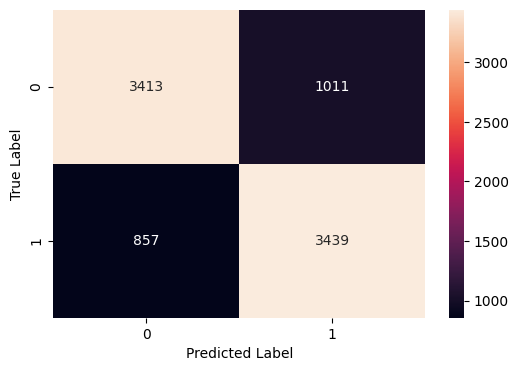

In [30]:
# show the confusion matrix 
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()